<a href="https://colab.research.google.com/github/natalfr17/An-lise-Estat-stica-de-Dados-e-Informa-es/blob/main/Tarefa_5_Parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Parte 2**

Refazendo o modelo com outra técnica de balanceamento de classes

In [30]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    roc_auc_score,
    confusion_matrix,
)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [31]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("adammaus/predicting-churn-for-bank-customers")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/predicting-churn-for-bank-customers


In [32]:
# Ler base

df = pd.read_csv(path + "/Churn_Modelling.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**Análise de Retenção de Clientes**





In [33]:
# Análise de Distribuição da variável 'Exited'

print("\n-- Distribuição da variável resposta 'Exited' --")
print(df["Exited"].value_counts())
print(
    "\nPercentual de Churn:",
    df["Exited"].value_counts(normalize=True)[1] * 100,
    "%",
)
print(
    "Percentual de Não-Churn:",
    df["Exited"].value_counts(normalize=True)[0] * 100,
    "%",
)


-- Distribuição da variável resposta 'Exited' --
Exited
0    7963
1    2037
Name: count, dtype: int64

Percentual de Churn: 20.369999999999997 %
Percentual de Não-Churn: 79.63 %


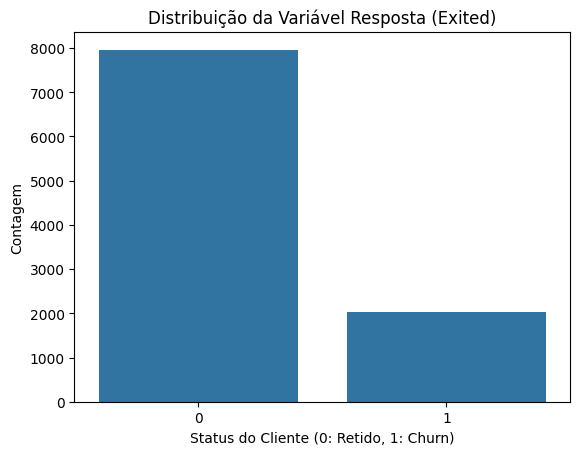

In [34]:
sns.countplot(x="Exited", data=df)
plt.title("Distribuição da Variável Resposta (Exited)")
plt.xlabel("Status do Cliente (0: Retido, 1: Churn)")
plt.ylabel("Contagem")
plt.show()

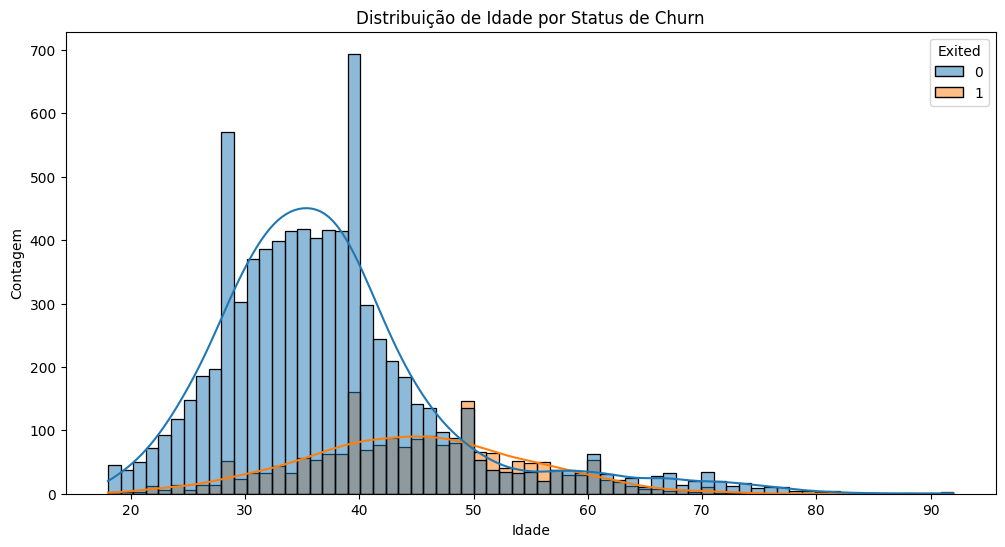

In [35]:
# Visualização gráfica de algumas variáveis

plt.figure(figsize=(12, 6))
sns.histplot(x="Age", hue="Exited", data=df, kde=True)
plt.title("Distribuição de Idade por Status de Churn")
plt.xlabel("Idade")
plt.ylabel("Contagem")
plt.show()

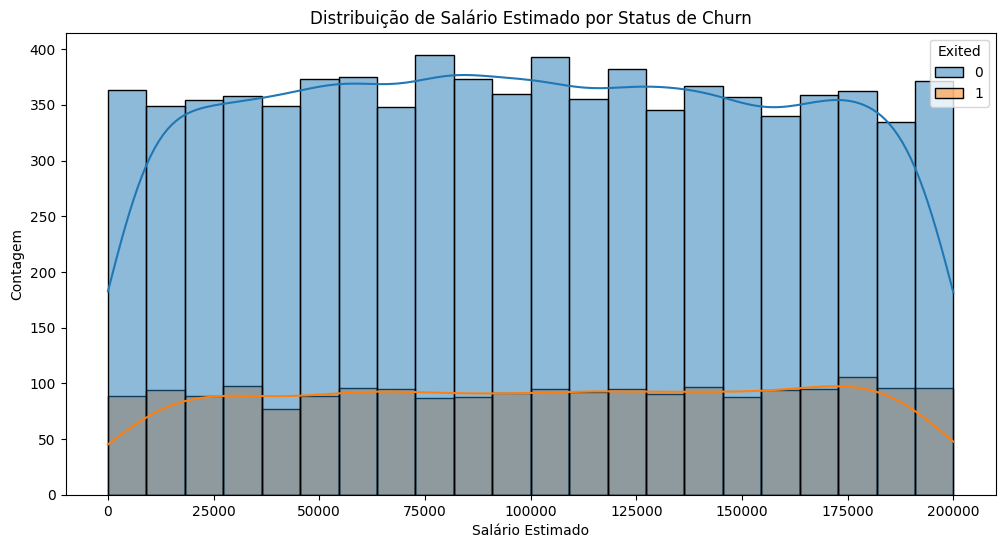

In [36]:
plt.figure(figsize=(12, 6))
sns.histplot(x="EstimatedSalary", hue="Exited", data=df, kde=True)
plt.title("Distribuição de Salário Estimado por Status de Churn")
plt.xlabel("Salário Estimado")
plt.ylabel("Contagem")
plt.show()

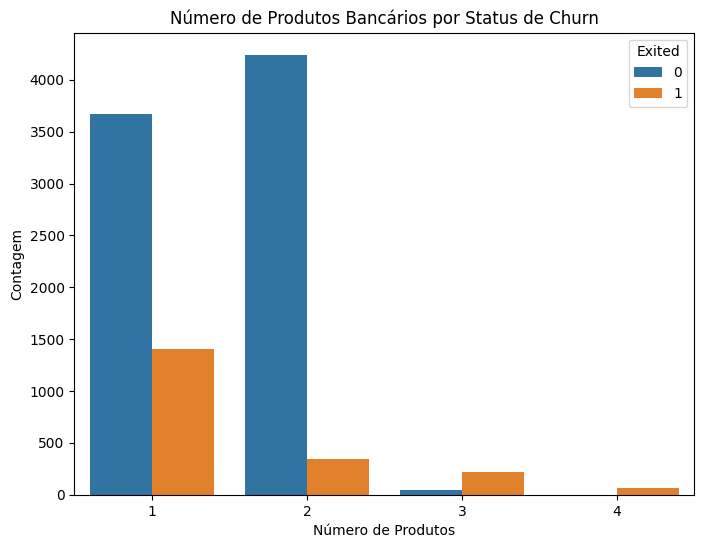

In [37]:
plt.figure(figsize=(8, 6))
sns.countplot(x="NumOfProducts", hue="Exited", data=df)
plt.title("Número de Produtos Bancários por Status de Churn")
plt.xlabel("Número de Produtos")
plt.ylabel("Contagem")
plt.show()

# **Rebalanceando o banco de dados**

In [38]:
target = "Exited"

# Selecionando TODAS as variáveis do DataFrame, EXCETO 'Exited'**
# E removendo também colunas de identificação que não são features preditivas.
columns_to_drop_for_features = ['RowNumber', 'CustomerId', 'Surname', target]

# Tratamento de variáveis categóricas (One-Hot Encoding)
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True) # drop_first para evitar multicolinearidade

# Seleciona todas as colunas que não são de identificação ou o target.
initial_features = [col for col in df.columns if col not in columns_to_drop_for_features]

print(f"\nCaracterísticas potenciais iniciais para seleção RFE (todas exceto o target e IDs): {initial_features}")

# **APLICANDO TÉCNICA DE BALANCEAMENTO DE CLASSE (UNDERSAMPLING ALEATÓRIO)**
# Separar as classes majoritária (0 - retidos) e minoritária (1 - churn)
df_majority = df[df[target] == 0]
df_minority = df[df[target] == 1]

# Determinar o número de amostras na classe minoritária
minority_count = len(df_minority)

# Realizar o undersampling aleatório da classe majoritária
# Seleciona um número de amostras da classe majoritária igual ao número de amostras da classe minoritária
df_majority_undersampled = df_majority.sample(n=minority_count, random_state=42)

# Combinar a classe majoritária undersampled com a classe minoritária para formar o novo dataset balanceado
df_balanced = pd.concat([df_majority_undersampled, df_minority])

print("\nDataset balanceado criado com sucesso!")
print("Nova distribuição da variável resposta 'Exited' (Dataset Balanceado):")
print(df_balanced['Exited'].value_counts())
print(
    f"Total de amostras no dataset balanceado: {len(df_balanced)}"
)


Características potenciais iniciais para seleção RFE (todas exceto o target e IDs): ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_Germany', 'Geography_Spain', 'Gender_Male']

Dataset balanceado criado com sucesso!
Nova distribuição da variável resposta 'Exited' (Dataset Balanceado):
Exited
0    2037
1    2037
Name: count, dtype: int64
Total de amostras no dataset balanceado: 4074


In [39]:
# Definir X e y do dataset balanceado usando TODAS as features potenciais antes do RFE
X = df_balanced[initial_features]
y = df_balanced[target]

# Divisão dos dados em conjunto de treino e teste ANTES do RFE
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nShape de X_train (Dataset Balanceado, Pré-RFE): {X_train.shape}")
print(f"Shape de X_test (Dataset Balanceado, Pré-RFE): {X_test.shape}")
print(f"Shape de y_train (Dataset Balanceado, Pré-RFE): {y_train.shape}")
print(f"Shape de y_test (Dataset Balanceado, Pré-RFE): {y_test.shape}")


Shape de X_train (Dataset Balanceado, Pré-RFE): (3259, 11)
Shape de X_test (Dataset Balanceado, Pré-RFE): (815, 11)
Shape de y_train (Dataset Balanceado, Pré-RFE): (3259,)
Shape de y_test (Dataset Balanceado, Pré-RFE): (815,)


In [40]:
# O RFE será aplicado no conjunto de treino para selecionar as melhores features.

model_rfe = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42)
# **ALTERAÇÃO AQUI: n_features_to_select definido para 10, conforme solicitado**
rfe = RFE(estimator=model_rfe, n_features_to_select=10)

# O RFE precisa de um array 1D para y_train
rfe.fit(X_train, y_train.values.ravel())

# Obter as variáveis selecionadas
variaveis_selecionadas = X.columns[rfe.support_].tolist()

print("\nVariáveis selecionadas pelo RFE:", variaveis_selecionadas)
print("Número de variáveis selecionadas:", len(variaveis_selecionadas))


Variáveis selecionadas pelo RFE: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Geography_Germany', 'Geography_Spain', 'Gender_Male']
Número de variáveis selecionadas: 10


In [41]:
# Filtrar os conjuntos de treino e teste para usar apenas as variáveis selecionadas**
X_train = X_train[variaveis_selecionadas]
X_test = X_test[variaveis_selecionadas]

# Atualizar a lista de features para os próximos passos (interpretação, VIF, etc.)
features_final = variaveis_selecionadas

print(f"\nShape de X_train (Pós-RFE): {X_train.shape}")
print(f"Shape de X_test (Pós-RFE): {X_test.shape}")


Shape de X_train (Pós-RFE): (3259, 10)
Shape de X_test (Pós-RFE): (815, 10)


In [42]:
# Escalonamento das features numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertendo de volta para DataFrame para manter os nomes das colunas (opcional, mas útil para interpretação)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=features_final, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=features_final, index=X_test.index)

In [43]:
# Instanciando e treinando o modelo de Regressão Logística
model = LogisticRegression(solver="liblinear", random_state=42)
model.fit(X_train_scaled, y_train)

print("\nModelo de Regressão Logística treinado com sucesso no dataset balanceado e features selecionadas.")


Modelo de Regressão Logística treinado com sucesso no dataset balanceado e features selecionadas.


In [44]:
# Exibindo os coeficientes do modelo
coefficients = pd.DataFrame(
    {"Feature": features_final, "Coefficient": model.coef_[0]}
).sort_values(by="Coefficient", ascending=False)
print("\n-- Coeficientes do Modelo de Regressão Logística (Dataset Balanceado e RFE) --")
print(coefficients)

# Interpretação dos coeficientes:
print("\n-- Interpretação dos Coeficientes --")
print(
    "Os coeficientes indicam a mudança no log-odds de um cliente sair do banco (churn) para cada aumento de uma unidade na variável preditora, mantendo outras variáveis constantes."
)
print(
    "Variáveis com coeficientes positivos aumentam a probabilidade de churn, enquanto variáveis com coeficientes negativos a diminuem."
)
for index, row in coefficients.iterrows():
    feature = row["Feature"]
    coef = row["Coefficient"]
    if coef > 0:
        print(
            f"- Um aumento em '{feature}' está associado a um aumento na probabilidade de churn (log-odds positivo)."
        )
    else:
        print(
            f"- Um aumento em '{feature}' está associado a uma diminuição na probabilidade de churn (log-odds negativo)."
        )


-- Coeficientes do Modelo de Regressão Logística (Dataset Balanceado e RFE) --
             Feature  Coefficient
1                Age     0.804301
7  Geography_Germany     0.351562
3            Balance     0.160453
8    Geography_Spain     0.037904
5          HasCrCard    -0.036232
2             Tenure    -0.059240
4      NumOfProducts    -0.089234
0        CreditScore    -0.096617
9        Gender_Male    -0.300555
6     IsActiveMember    -0.509420

-- Interpretação dos Coeficientes --
Os coeficientes indicam a mudança no log-odds de um cliente sair do banco (churn) para cada aumento de uma unidade na variável preditora, mantendo outras variáveis constantes.
Variáveis com coeficientes positivos aumentam a probabilidade de churn, enquanto variáveis com coeficientes negativos a diminuem.
- Um aumento em 'Age' está associado a um aumento na probabilidade de churn (log-odds positivo).
- Um aumento em 'Geography_Germany' está associado a um aumento na probabilidade de churn (log-odds posit

In [45]:
# Para uma interpretação mais intuitiva, podemos calcular as razões de chance (odds ratio).
odds_ratios = np.exp(model.coef_[0])
odds_ratios_df = pd.DataFrame(
    {"Feature": features_final, "Odds Ratio": odds_ratios}
).sort_values(by="Odds Ratio", ascending=False)
print("\n-- Razões de Chance (Odds Ratio) (Dataset Balanceado e RFE) --")
print(odds_ratios_df)

print("\n-- Interpretação das Razões de Chance --")
print(
    "As razões de chance representam o fator pelo qual as chances de churn mudam para cada aumento de uma unidade na variável preditora, mantendo outras variáveis constantes."
)
for index, row in odds_ratios_df.iterrows():
    feature = row["Feature"]
    odds = row["Odds Ratio"]
    if odds > 1:
        print(
            f"- Para cada unidade de aumento em '{feature}', as chances de churn aumentam em um fator de {odds:.2f}."
        )
    elif odds < 1:
        print(
            f"- Para cada unidade de aumento em '{feature}', as chances de churn diminuem em um fator de {odds:.2f}."
        )
    else:
        print(
            f"- Para cada unidade de aumento em '{feature}', as chances de churn permanecem as mesmas."
        )


-- Razões de Chance (Odds Ratio) (Dataset Balanceado e RFE) --
             Feature  Odds Ratio
1                Age    2.235134
7  Geography_Germany    1.421285
3            Balance    1.174043
8    Geography_Spain    1.038632
5          HasCrCard    0.964416
2             Tenure    0.942480
4      NumOfProducts    0.914631
0        CreditScore    0.907904
9        Gender_Male    0.740407
6     IsActiveMember    0.600844

-- Interpretação das Razões de Chance --
As razões de chance representam o fator pelo qual as chances de churn mudam para cada aumento de uma unidade na variável preditora, mantendo outras variáveis constantes.
- Para cada unidade de aumento em 'Age', as chances de churn aumentam em um fator de 2.24.
- Para cada unidade de aumento em 'Geography_Germany', as chances de churn aumentam em um fator de 1.42.
- Para cada unidade de aumento em 'Balance', as chances de churn aumentam em um fator de 1.17.
- Para cada unidade de aumento em 'Geography_Spain', as chances de chu

# **Validação dos pressupostos**

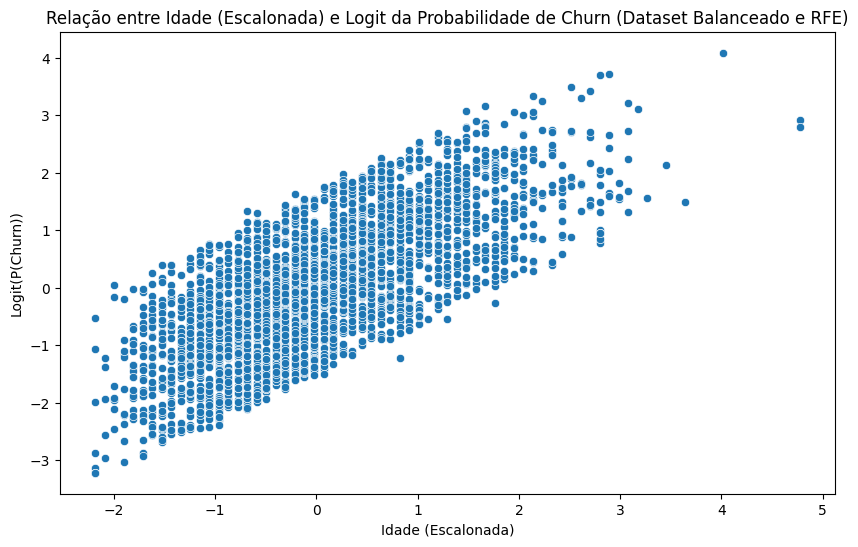

In [46]:
# Pressuposto 1: Linearidade entre as variáveis independentes e o logit
# Criando um DataFrame com as previsões de probabilidade no conjunto de treino escalado
probabilities = model.predict_proba(X_train_scaled)[:, 1]
logit = np.log(probabilities / (1 - probabilities))

# Visualizando a relação para uma das variáveis selecionadas, por exemplo, 'Age'
# **ALTERAÇÃO AQUI: O gráfico usará uma das features selecionadas pelo RFE**
if 'Age' in features_final: # Verificar se Age foi selecionado
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X_train_scaled_df["Age"], y=logit)
    plt.title("Relação entre Idade (Escalonada) e Logit da Probabilidade de Churn (Dataset Balanceado e RFE)")
    plt.xlabel("Idade (Escalonada)")
    plt.ylabel("Logit(P(Churn))")
    plt.show()
else:
    print("\n'Age' não foi selecionada pelo RFE. Não é possível gerar o gráfico para esta variável.")
    print(f"Variáveis selecionadas pelo RFE: {features_final}")

O gráfico mostra uma relação aproximadamente linear entre a variável Idade (escalonada) e o logit da probabilidade de churn, atendendo ao pressuposto de linearidade exigido pelo modelo de regressão logística. Isso indica que a idade é uma variável adequada para o modelo, pois sua associação com o logit é consistente. Quanto maior a idade, maior a tendência de churn prevista pelo modelo.

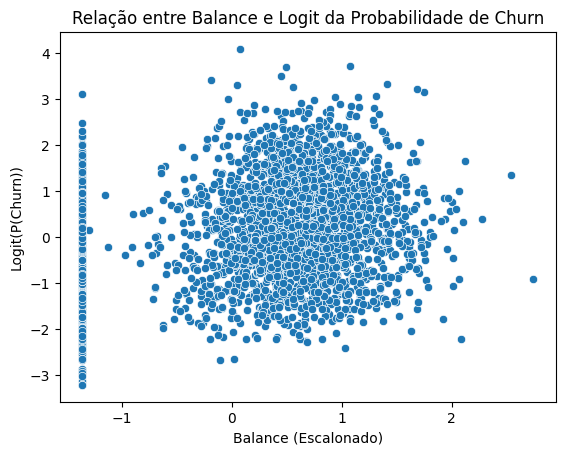

In [47]:
sns.scatterplot(x=X_train_scaled_df['Balance'], y=logit)
plt.title("Relação entre Balance e Logit da Probabilidade de Churn")
plt.xlabel("Balance (Escalonado)")
plt.ylabel("Logit(P(Churn))")
plt.show()

O gráfico mostra ausência de relação linear clara entre o saldo da conta (Balance) e o logit da probabilidade de churn. Os pontos estão espalhados de forma dispersa e simétrica, sem uma tendência evidente. Isso indica que Balance pode não contribuir de forma linear para o modelo de regressão logística. Seu efeito sobre o churn pode ser fraco ou não linear.

**Verificação de Multicolinearidade (VIF)**

In [48]:
# Adicionando uma constante para o cálculo do VIF, conforme recomendado para regressão
X_train_const = sm.add_constant(X_train_scaled_df)

vif_data = pd.DataFrame()
vif_data["feature"] = X_train_const.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_train_const.values, i)
    for i in range(len(X_train_const.columns))
]

print(vif_data)

              feature       VIF
0               const  1.000000
1         CreditScore  1.002356
2                 Age  1.010903
3              Tenure  1.003653
4             Balance  1.240135
5       NumOfProducts  1.045932
6           HasCrCard  1.005435
7      IsActiveMember  1.009207
8   Geography_Germany  1.347515
9     Geography_Spain  1.142920
10        Gender_Male  1.007026


A análise do VIF (Variance Inflation Factor) mostra que não há multicolinearidade preocupante entre as variáveis independentes, pois todos os valores estão abaixo de 5 — e majoritariamente próximos de 1. Isso indica que as variáveis são relativamente independentes entre si e, portanto, adequadas para regressão logística.

# **Avaliação da Previsibilidade do Modelo**

In [49]:
# Previsões no conjunto de teste
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]  # Probabilidades da classe 1 (churn)
y_pred = model.predict(X_test_scaled)  # Previsões de classe (0 ou 1)

# Calculando as métricas de avaliação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

print(f"\n-- Métricas de Avaliação no Conjunto de Teste --")
print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Sensibilidade (Recall): {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")


-- Métricas de Avaliação no Conjunto de Teste --
Acurácia: 0.6994
Precisão: 0.7088
Sensibilidade (Recall): 0.6757
F1-Score: 0.6918
AUC: 0.7629


O modelo alcançou 69,94% de acurácia, indicando a proporção de previsões corretas. Com uma precisão de 70,88%, ele é razoável em prever churn quando ocorre. A sensibilidade (recall) de 67,57% mostra a capacidade do modelo de identificar clientes que realmente sairão. O F1-Score de 69,18% equilibra precisão e recall. A AUC de 0.7629 demonstra uma boa capacidade do modelo em distinguir entre clientes que permanecem e os que saem.

# **Matriz de Confusão**


-- Matriz de Confusão --
[[295 113]
 [132 275]]


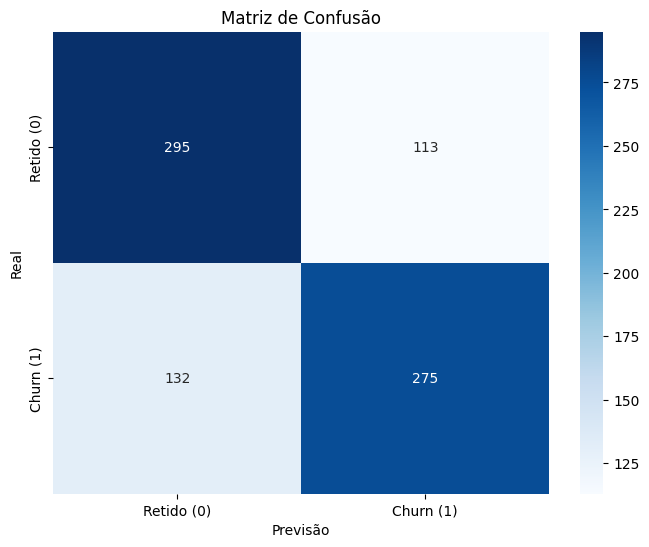

In [50]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\n-- Matriz de Confusão --")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Retido (0)", "Churn (1)"],
    yticklabels=["Retido (0)", "Churn (1)"],
)
plt.xlabel("Previsão")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

A matriz de confusão mostra que o modelo previu corretamente 295 clientes como "Retidos" (Verdadeiros Negativos) e 275 clientes como "Churn" (Verdadeiros Positivos). Contudo, houve 113 clientes que foram previstos como "Churn" mas permaneceram (Falsos Positivos) e 132 clientes que foram previstos como "Retidos" mas saíram (Falsos Negativos).

# **Curva ROC**

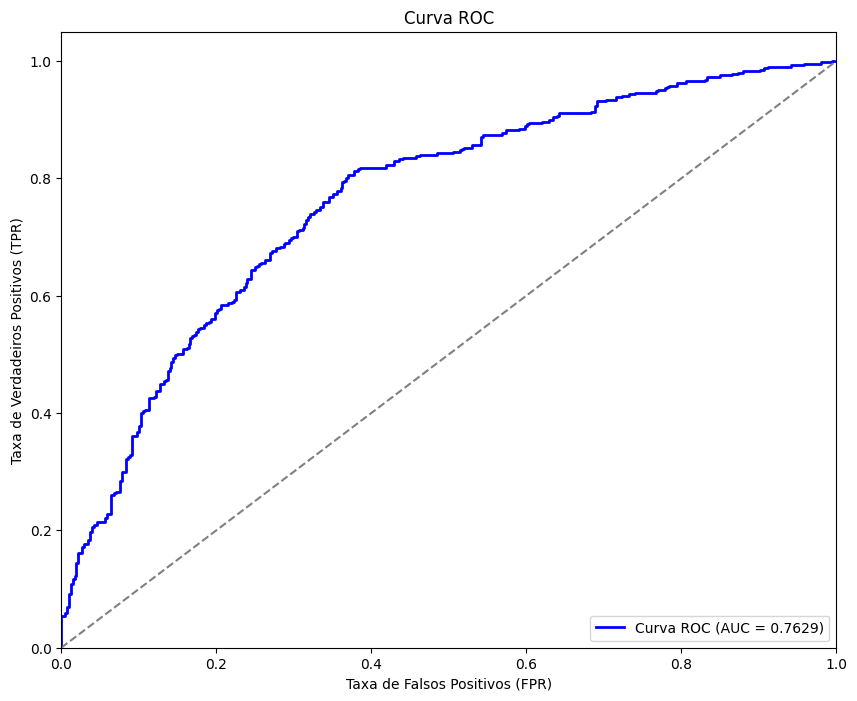

In [51]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"Curva ROC (AUC = {auc:.4f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Taxa de Falsos Positivos (FPR)")
plt.ylabel("Taxa de Verdadeiros Positivos (TPR)")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.show()

Com um valor AUC (Área Sob a Curva) de 0.7629, o modelo demonstra uma boa capacidade de diferenciação, sendo superior a um modelo aleatório (que teria AUC de 0.5). A curva azul, que representa o modelo, se afasta da linha pontilhada diagonal (que representa um classificador aleatório), indicando sua eficácia preditiva.

**a) Modelagem da Retenção de Clientes**

O 1º modelo de regressão logística foi construído utilizando a base balanceada com SMOTE, e a seleção de variáveis foi feita por RFE, resultando em 15 variáveis. Variáveis como idade, saldo, número de produtos e atividade do cliente foram incluídas. Já no 2º modelo, aplicou-se o undersampling aleatório da classe majoritária e foram selecionadas 10 variáveis por RFE. Os coeficientes foram interpretados com base no log-odds, revelando que maior idade, estar na Alemanha e ter maior saldo aumentam a chance de churn, enquanto ser um membro ativo ou possuir mais produtos diminui essa probabilidade.

OBS: a influência de cada característica foi melhor explicada abaixo da linha de código que gerou os coeficientes

**b) Validação dos Pressupostos do Modelo**

Ambos os modelos validaram os principais pressupostos da regressão logística. Em relação à linearidade com o logit, observou-se relação aproximadamente linear apenas para a variável idade. A verificação de multicolinearidade (VIF) demonstrou ausência de colinearidade relevante, com todos os VIFs abaixo de 2. Quanto ao balanceamento da variável dependente, o primeiro modelo usou SMOTE (oversampling) e o segundo modelo aplicou undersampling aleatório, justificando ambas as abordagens pela necessidade de melhorar o desempenho do modelo na detecção da classe minoritária. Foi observado um resultado melhor na segunda técnica de undersampling.

**c) Importância das Variáveis**

No primeiro modelo, os odds ratios mostraram que variáveis como Age, Geography_Germany, IsActiveMember_0 e Gender_Female aumentam significativamente a chance de churn, com razões de chance elevadíssimas, indicando possíveis problemas de instabilidade no modelo. Enquanto no segundo, a análise foi mais estável: Age, Geography_Germany e Balance foram as variáveis com maior impacto positivo no churn, enquanto IsActiveMember, Gender_Male e CreditScore foram associadas à redução da probabilidade de saída. Essas variáveis são úteis para segmentar clientes e orientar ações de retenção.

**d) Avaliação do Modelo**

O modelo 1 apresentou acurácia de 81%, mas recall de apenas 29%, indicando baixa sensibilidade para detectar clientes que saem. Já o modelo 2 teve acurácia menor (69,9%), mas obteve recall de 67,6% e F1-score de 69,2%, demonstrando melhor equilíbrio entre sensibilidade e precisão. A AUC foi semelhante em ambos os casos (~0.76), mas a matriz de confusão da Parte 2 mostra que o modelo acerta mais churns, o que é preferível em cenários em que o custo de perder um cliente é alto.

**Conclusão Comparativa entre os Modelos**

O modelo 2, baseado em undersampling aleatório, apresentou desempenho mais equilibrado entre as classes, com maior recall e F1-score, tornando-o mais eficiente na identificação de clientes em risco de churn. Apesar da acurácia ser inferior à do modelo com SMOTE, a capacidade de detectar clientes que realmente saem é essencial para ações de retenção. Assim, o modelo 2 é preferível do ponto de vista estratégico e negocial, pois prioriza a detecção correta da classe minoritária, que é o foco do problema de negócio.